## Clustering

In [135]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [113]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

#### Dataset:

This dataset is related to the Anuran Frog species recognition through their calls with acoustic features. It is taken from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29

We are going to use this dataset for the clustering alogrithm to cluster the data based on the Family, Genus and Species of the frogs. 

In [122]:
df = pd.read_csv('./data/Frogs_MFCCs.csv')
# shuffle
df = shuffle(df)

In [123]:
df.head()

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
5747       1.0  0.499136  0.438512  0.222690  0.032500  0.158226  0.054049   
4618       1.0  0.067096  0.155329  0.618436  0.241720  0.054939 -0.132060   
2487       1.0  0.314157  0.314226  0.563561  0.161958 -0.053054 -0.134209   
4940       1.0  0.200455  0.033877  0.331629  0.264269  0.139899 -0.028427   
461        1.0  0.569552  0.639948  0.710661 -0.324338 -0.223474  0.407881   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_17  MFCCs_18  MFCCs_19  \
5747 -0.001330  0.083786  0.079589    ...     0.021804 -0.011914  0.010356   
4618 -0.031003  0.201294  0.005000    ...     0.192656 -0.157497 -0.219007   
2487  0.061029  0.328290  0.043740    ...     0.178236 -0.019804 -0.118524   
4940 -0.158154  0.030272  0.322805    ...    -0.130231 -0.011155  0.111938   
461   0.146620 -0.303493  0.092887    ...    -0.018643  0.217563  0.046649   

      MFCCs_20  MFCCs_21  MFCCs_22           Family          Genus  \
5747 -0.012929 -0.017945  0.035019          Hylidae      Hypsiboas   
4618 -0.099123  0.143625  0.172157  Leptodactylidae      Adenomera   
2487 -0.130792  0.062260  0.193537  Leptodactylidae      Adenomera   
4940  0.198746  0.057317 -0.221120          Hylidae  Dendropsophus   
461  -0.073297  0.049089  0.140440  Leptodactylidae      Adenomera   

                     Species  RecordID  
5747       HypsiboasCordobae        40  
4618  AdenomeraHylaedactylus        24  
2487  AdenomeraHylaedactylus        19  
4940              HylaMinuta        34  
461           AdenomeraAndre         8  

[5 rows x 26 columns]

In [124]:
print('Number of unique families: ', df.Family.nunique())
print('Number of unique genuses: ', df.Genus.nunique())
print('Number of unique species: ', df.Species.nunique())

Number of unique families:  4
Number of unique genuses:  8
Number of unique species:  10


In [125]:
# features
X = df.drop(columns=['Family', 'Genus', 'Species', 'RecordID'], inplace=False)

In [126]:
y_pred = KMeans(n_clusters=4).fit_predict(X)

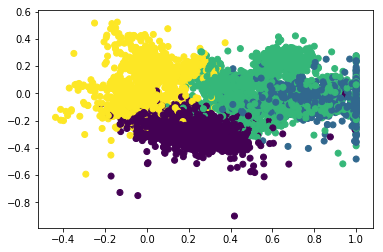

In [127]:
plt.scatter(X.values[:, 2], X.values[:, 10], c=y_pred);

In [128]:
y_pred = KMeans(n_clusters=8).fit_predict(X)

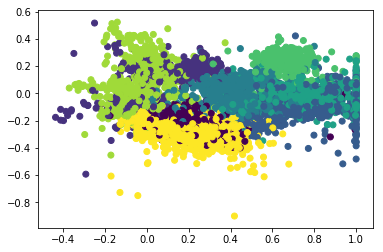

In [129]:
plt.scatter(X.values[:, 2], X.values[:, 10], c=y_pred);

In [130]:
y_pred = KMeans(n_clusters=10).fit_predict(X)

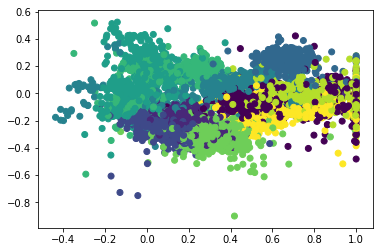

In [131]:
plt.scatter(X.values[:, 2], X.values[:, 10], c=y_pred);

In [137]:
df.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

In [138]:
variables = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
           'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
           'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
           'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']

In [141]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

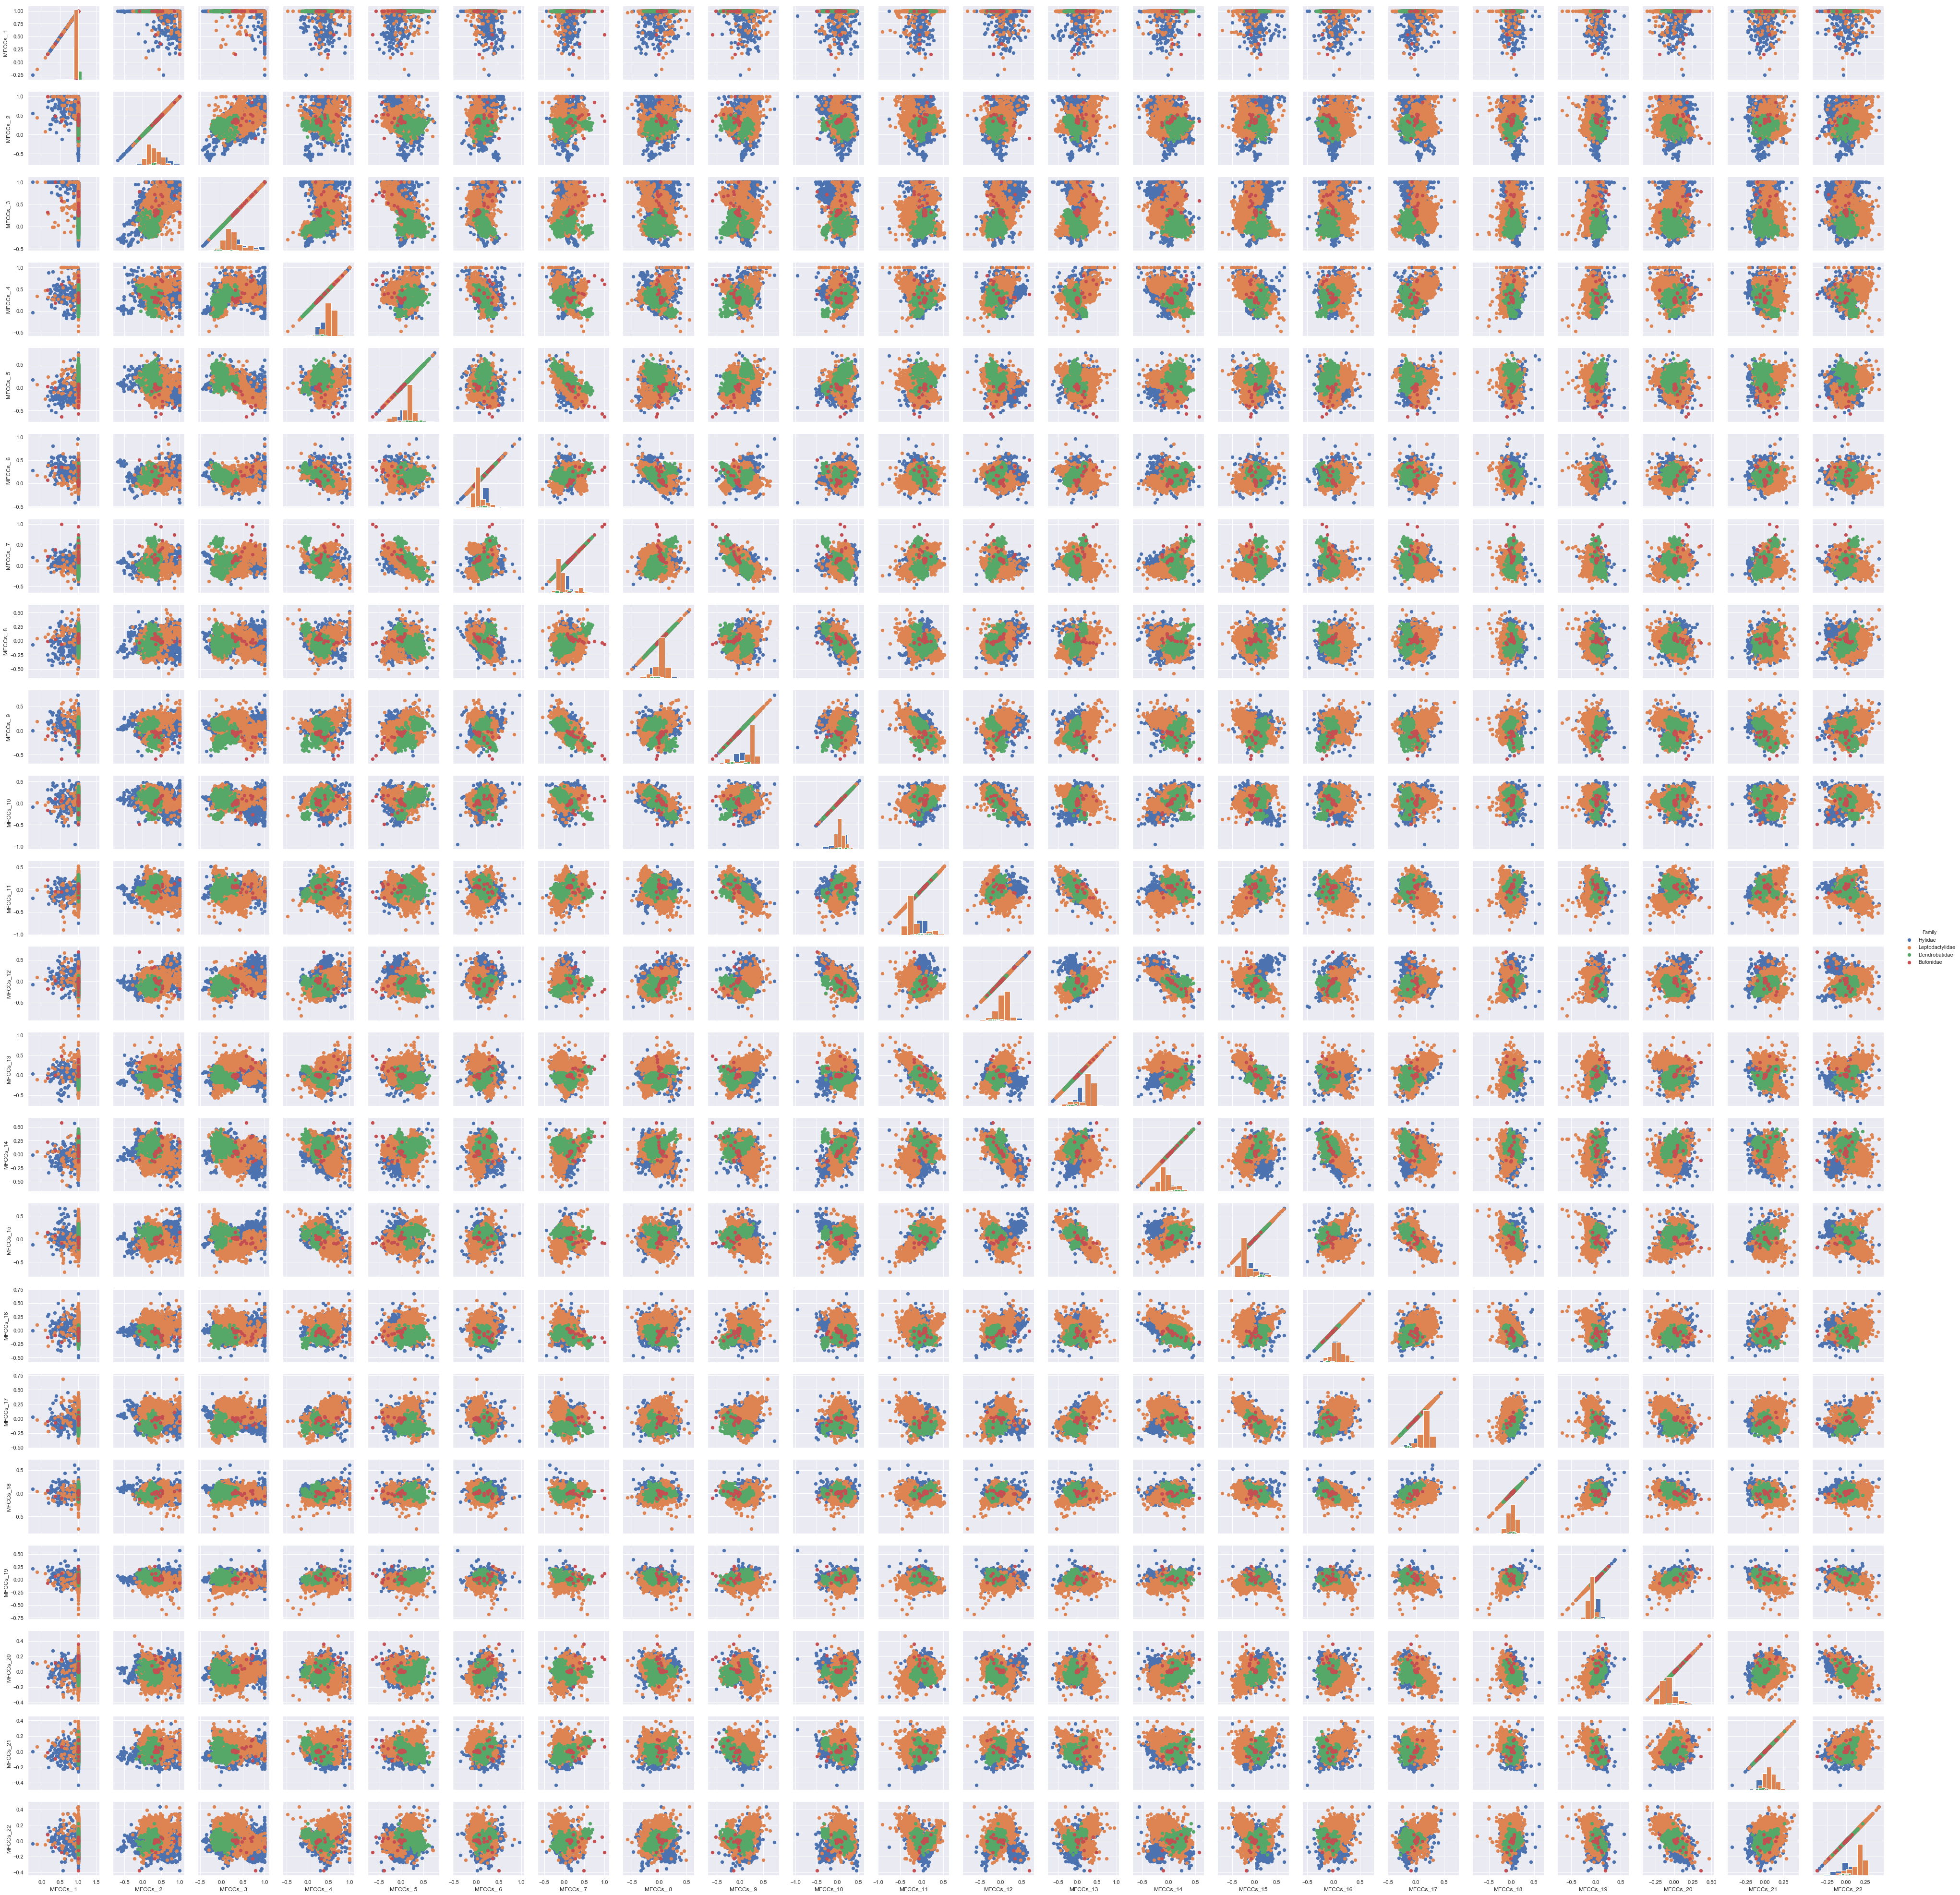

In [142]:
sns.set(style='darkgrid')

g = sns.PairGrid(df, hue='Family', vars=variables)

g = g.map_diag(plt.hist)
g = g.map(plt.scatter, linewidths=1, s=40)
g = g.add_legend();

#### Elbow curve
Helps to decide the correct numbers of clusters.

In [132]:
distances_sum = []
nmax = 18
for k in range(1, nmax):
    model = KMeans(n_clusters=k)
    model = model.fit(X)
    distances_sum.append(model.inertia_)

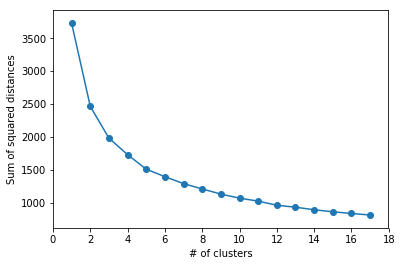

In [133]:
plt.plot(np.arange(1, nmax), distances_sum);
plt.scatter(np.arange(1, nmax), distances_sum);
plt.ylabel('Sum of squared distances')
plt.xlabel('# of clusters');

It seems the clustering into four distinct families works best from the above clustering experiements for different families, genuses and species.